RC [µs] = 293.3838210408594 , Standardfehler = 1.3486797954803351


f_g [kHz] = 3.4085042469357254 , Standardfehler = 0.01566915974051449


Chi-Quadrat = 3.5289447981851856
Freiheitsgrade = 9
Chi-Quadrat reduziert = 0.3921049775761317
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 94.0 %


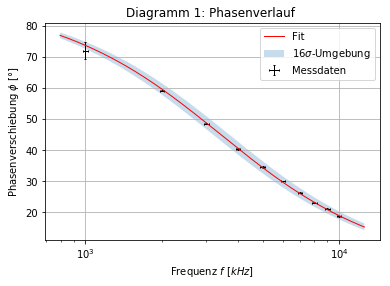

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messwerte aus Tabelle 3: t über f
f = np.array([1,2,3,4,5,6,7,8,9,10])*1e3
fehler_f = f*2e-2

t = np.array([200.00,82.00,44.80,28.00,19.20,13.90,10.40,8.00,6.48,5.16])*1e-6
fehler_t = np.array([7.7,0.14,0.14,0.14,0.14,0.01,0.1,0.1,0.05,0.06])*1e-6

phi = t*f*360
fehler_phi = np.sqrt((fehler_t/t)**2+(fehler_f/f**2))*phi
                    
#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (rc) = p
    return np.arctan(1/(x*rc))*180/np.pi

model = odr.Model(fit_func)

#darzustellende Daten
x = f
y = phi
delta_x = fehler_f
delta_y = fehler_phi

#Startparameter
para0 = [1.0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 16 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.logspace(np.log10(min(x))-0.1, np.log10(max(x))+0.1, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 1: Phasenverlauf ')
plt.grid(True)
plt.xscale('log')
plt.xlabel('Frequenz '+r'${f}$'+' '+r'${[kHz]}$')
plt.ylabel('Phasenverschiebung '+r'${\phi}$' + ' '+r'${[°]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100
                    
#Grenzfrequenz
def fit_func_rev(x, p):
    (rc) = p
    return 1/(np.tan(x*np.pi/180)*rc)

phi_g = 45
f_g = fit_func_rev(phi_g, popt)
fehler_f_g = abs(fit_func_rev(phi_g, popt+perr)-fit_func_rev(phi_g, popt-perr))/2

#Output
plt.savefig('figures/241_Diagramm1.pdf', format='pdf')

print('RC [µs] =', popt[0]*1e6, ', Standardfehler =', perr[0]*1e6)
print('\n')                    
print('f_g [kHz] =', f_g[0]*1e-3, ', Standardfehler =', fehler_f_g[0]*1e-3)
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

U_0 [V] = 11.068419409321136 , Standardfehler = 0.8112838698051997
delta [kHz] = 2.554372698550157 , Standardfehler = 0.08202561048008566


Chi-Quadrat = 0.4649566669495556
Freiheitsgrade = 3
Chi-Quadrat reduziert = 0.15498555564985186
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 93 %


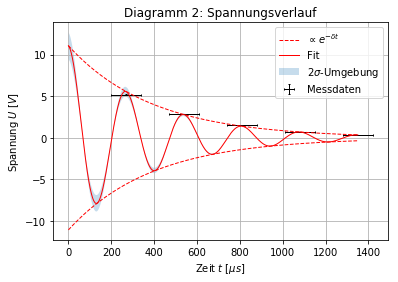

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messwerte aus Tabelle 5: U_max über n
T = (1.080/4)*1e3

t = np.array([1,2,3,4,5])*T
fehler_t = np.array([0.07, 0.07, 0.07, 0.07, 0.07])*1e3

U_max = np.array([5.200, 2.860, 1.530, 0.690, 0.340])
fehler_U_max = np.array([0.035, 0.035, 0.014, 0.014, 0.007])

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (A, d) = p
    return A*np.exp(-d*x)

model = odr.Model(fit_func)

#darzustellende Daten
x = t
y = U_max
delta_x = fehler_t
delta_y = fehler_U_max

#Startparameter
para0 = [10.0, 0.0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 2 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Wechselspannung
def AC(p, x):
    (A, d) = p
    return A*np.exp(-d*x)*np.cos((x/T)*2*np.pi)
                                 
#Plot-Umgebung
x_fit = np.linspace(0, max(x), 1000)
fit = fit_func(popt, x_fit)
fit_AC = AC(popt, x_fit)                          
fit_top = AC(popt_top, x_fit)
fit_bot = AC(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 2: Spannungsverlauf')
plt.grid(True)
plt.xlabel('Zeit '+r'${t}$'+' '+r'${[μs]}$')
plt.ylabel('Spannung '+r'${U}$' + ' '+r'${[V]}$')
plt.plot(x_fit, fit, 'r--', lw=1, label=r'${{\propto}e^{-{\delta}t}}$')
plt.plot(x_fit, -fit, 'r--', lw=1)
plt.plot(x_fit, fit_AC, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Output
plt.savefig('figures/241_Diagramm2.pdf', format='pdf')

print('U_0 [V] =', popt[0], ', Standardfehler =', perr[0])                 
print('delta [kHz] =', popt[1]*1e3, ', Standardfehler =', perr[1]*1e3,)
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = {value:.0f}'.format(value=prob), '%')